# ST445: Managing and Visualizing Data

## Matplotlib Primer: Basics

### Milan Vojnovic and Christine Yuen, MT 2017
---

In this notebook we demonstrate some basic functions of matplotlib library. We will show how to display one or more graphs in the same figure, how to change properties of plots such as line styles, scales of axis, and various other properties.

## Preparation

We need to include the following piece of code to import matplotlib.pyplot library and configure ipython to display plots inline in the notebook.

In [1]:
import matplotlib.pyplot as plt

# display plots inline
%matplotlib inline  

We generate some random data:

In [2]:
# generating data
import pandas as pd
import numpy as np

np.random.seed(10) # fixing random state for reproducibility
x = pd.period_range(pd.datetime.now(), periods=200, freq='d')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(len(x),3).cumsum(axis=0).transpose()
y1 = y[0]
y2 = y[1]
y3 = y[2]

## Plotting a graph

We show two different methods to plot a line graph. The first method is simplier. The second method let you do certain things as we will see shortly.

Method 1:

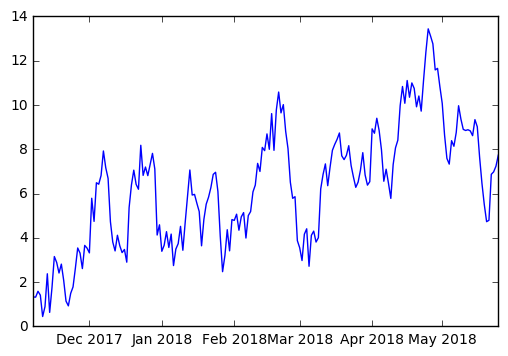

In [3]:
plt.plot(x, y1); # the semicolon supresses a text output

Method 2:

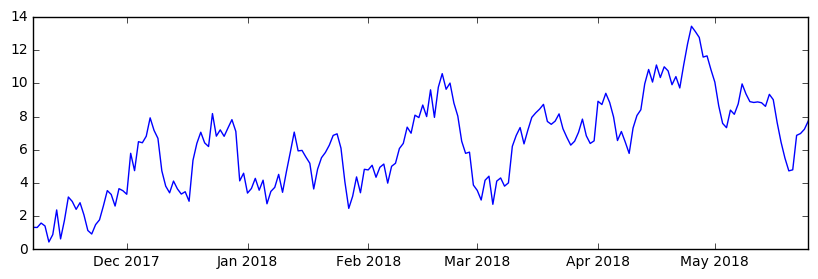

In [4]:
fig = plt.figure(figsize=(10,3)) # we added figsize to change the size of the plot
sub = fig.add_subplot(111)
sub.plot(x, y1) # without the semicolon you will see a text output [<matplotlib.lines.Line2D at ...>]

## Two or more plots in one figure

### Method 1 (add_subplot())
In this example, we plot three subplots in the same figure. For more information about plotting a histogram and plotting a scatter plot, you may have a look at other notebooks of the primer, or you may just ignore the details for now.

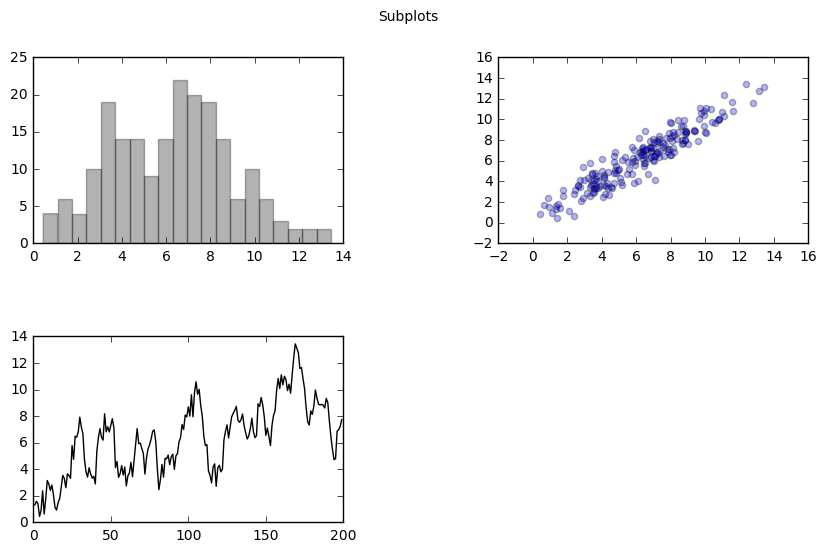

In [5]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Subplots')
ax1 = fig.add_subplot(2, 2, 1) # fig.add_subplot returns an AxesSubplot object that can be invoked for plotting
ax2 = fig.add_subplot(2, 2, 2) # Q: what does 2,2,2 mean?
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(y1, 'k-') # drawing on the last figure and subplot used (creating one if necessary) 
                   # alternatively, we can use ax3.plot(y, 'k-')

ax1.hist(y1, bins=20, color='k', alpha=0.3)
ax2.scatter(y1[0:len(y1)-1], y1[1:len(y1)], alpha=0.3)

# adjusting the spacing around subplots (the spacing is relative to the size of the plot)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5);

## Two or more plots in one figure

### Method 2 (subplots)

You can set the parameters (such as nrows, ncols, sharex, sharey, subplot_kw) to fix the number of rows and columns in the subplot, specify whether the plots should share the same x and y axis, etc. Here we create a graph with three subplots as an example. 

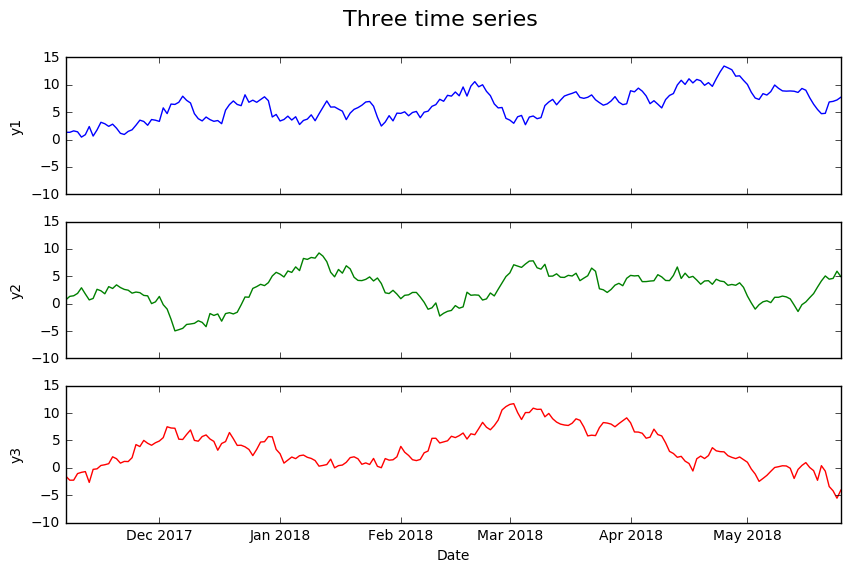

In [6]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex = True, sharey = True, figsize=(10,6))
fig.suptitle('Three time series', fontsize = 16)

# Iterate to draw each subplot
data = zip(y, ('y1', 'y2', 'y3'), ('b', 'g', 'r'))
for i, ld in enumerate(data): 
    ax = axes[i]
    ax.plot(x, ld[0], color=ld[2])
    ax.set_ylabel(ld[1])
    
axes[-1].set_xlabel('Date'); # setting the x axis for the last subplot

## Plotting functions provided by pandas

If the data is contained in a series or a dataframe, we can use their ```plot()``` functions to visualize data.

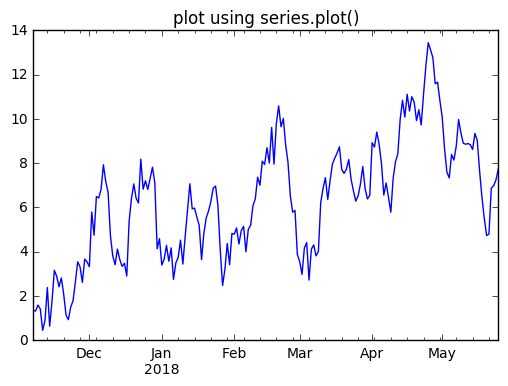

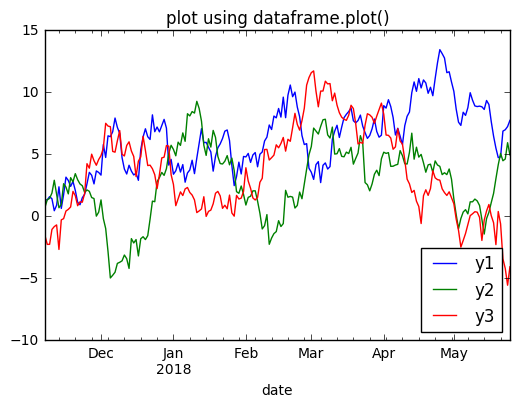

In [7]:
# pandas series example
fig, ax = plt.subplots()
s1 = pd.Series(y1, index=x)
s1.plot()
ax.set_title('plot using series.plot()') # here we set title using ax.set_title()

# dataframe series example
import datetime
df_dict = {'date':x, 'y1':y1, 'y2': y2, 'y3':y3}
df1 = pd.DataFrame.from_dict(df_dict) # create dataframe from dict
df1 = df1.set_index('date') # set x as index
df1.plot(title='plot using dataframe.plot()'); # here we set title when we call plot()

## Adding legends

This example shows how to draw a few lines in the same graph and add a legend.

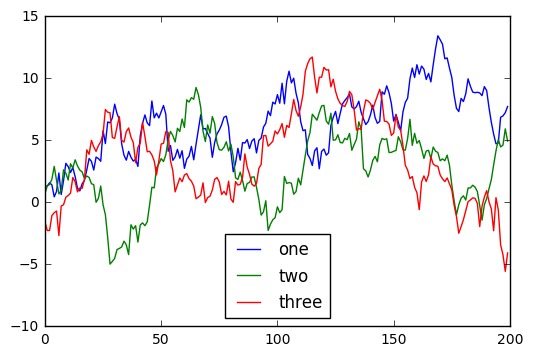

In [8]:
plt.plot(y1, 'b', label='one')
plt.plot(y2, 'g', label='two')
plt.plot(y3, 'r', label='three')
plt.legend(loc='best');
plt.plot();

## Colors, markers and line styles

We can set the color and style of lines and markers by supplying arguments to ```plot()```. 

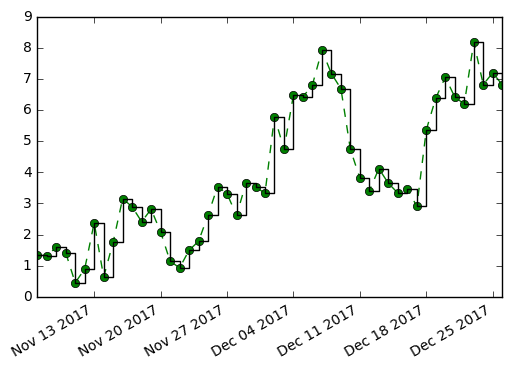

In [9]:
fig, ax = plt.subplots()
fig.autofmt_xdate() # make sure that x axis labels do not overlap

# setting the linestyle, color and marker
ax.plot(x[:50], y1[:50], linestyle='--', color='g', marker='o') # equivalent but shorter way: ax.plot(x, y, 'go--')

# setting the drawstyle and label
ax.plot(x[:50], y1[:50], 'k-', drawstyle='steps-post', label='steps-post');

## Ticks and labels

We can specify tick locations and labels by using ```set_xticks()``` and ```set_xticklabels()```.

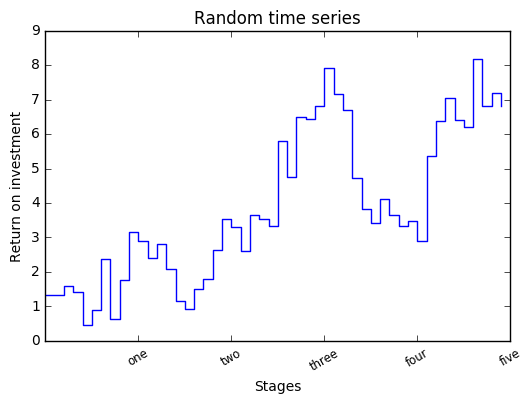

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Random time series')
ax.plot(y1[:50], drawstyle='steps-post')
ax.set_xlabel('Stages')
ax.set_ylabel('Return on investment')

# ticks
ticks = ax.set_xticks([10, 20, 30, 40, 50])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small');

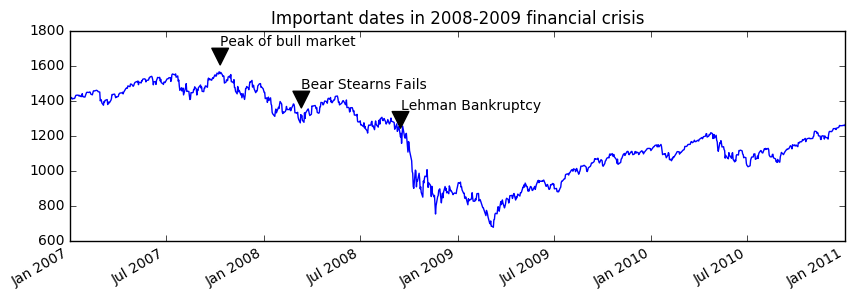

In [11]:
from datetime import datetime
import pandas as pd

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='b-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 220),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# zoom in the period from 2007 to 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

## Grid

Sometimes you may want to display a grid to make it easier to read coordinates of points on a graph.

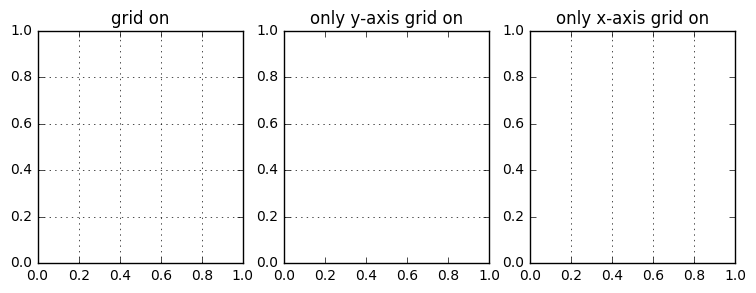

In [12]:
fig, ax = plt.subplots(1,3, figsize=(9,3))

# grid
ax[0].grid(True)
ax[0].set_title('grid on')

# horizontal lines
ax[1].yaxis.grid(True)
ax[1].set_title('only y-axis grid on')

# vertical lines
ax[2].xaxis.grid(True)
ax[2].set_title('only x-axis grid on');

## Annotations

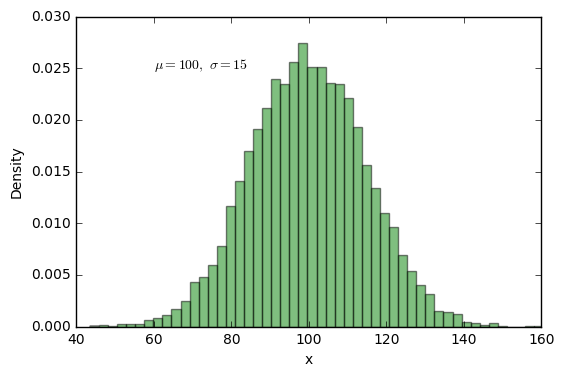

In [13]:
# generate some random data 
np.random.seed(19680801) 
mu, sigma = 100, 15
z = mu + sigma * np.random.randn(10000) # samples from a Gaussian distributio with mean mu and standard deviation sigma

# histogram of data
n, bins, patches = plt.hist(z, 50, normed=1, facecolor='g', alpha=0.5)

plt.xlabel('x')
plt.ylabel('Density')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.show()

# Axes scales

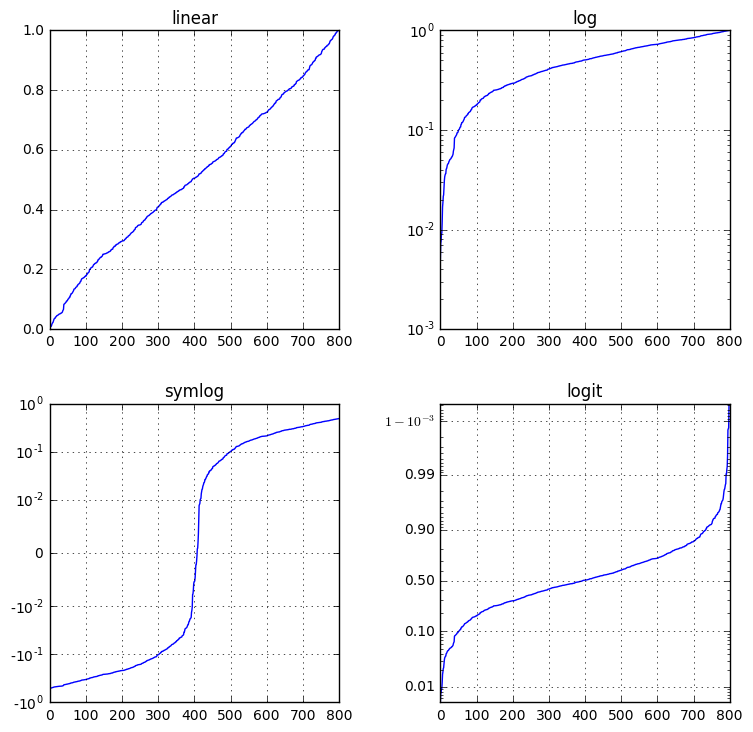

In [14]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(figsize=(8,8))

# linear
plt.subplot(221) # another way to create a subplot
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y-y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()